In [2]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [3]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [11]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


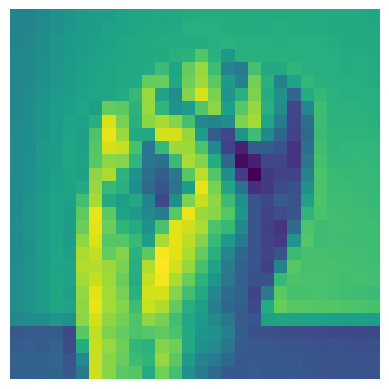

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = training_images[10]
plt.imshow(img)
plt.axis('Off')
plt.show()


In [14]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation='softmax')])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

Epoch 1/15
857/857 [==============================] - 27s 18ms/step - loss: 2.8118 - accuracy: 0.1453 - val_loss: 1.8105 - val_accuracy: 0.4214
Epoch 2/15
857/857 [==============================] - 19s 22ms/step - loss: 2.0485 - accuracy: 0.3521 - val_loss: 1.3519 - val_accuracy: 0.5781
Epoch 3/15
857/857 [==============================] - 16s 18ms/step - loss: 1.6817 - accuracy: 0.4610 - val_loss: 1.0776 - val_accuracy: 0.6223
Epoch 4/15
857/857 [==============================] - 15s 18ms/step - loss: 1.4795 - accuracy: 0.5244 - val_loss: 0.8341 - val_accuracy: 0.7128
Epoch 5/15
857/857 [==============================] - 15s 17ms/step - loss: 1.3103 - accuracy: 0.5748 - val_loss: 0.8186 - val_accuracy: 0.7232
Epoch 6/15
857/857 [==============================] - 16s 18ms/step - loss: 1.1911 - accuracy: 0.6092 - val_loss: 0.7878 - val_accuracy: 0.7381
Epoch 7/15
857/857 [==============================] - 14s 17ms/step - loss: 1.0982 - accuracy: 0.6378 - val_loss: 0.6280 - val_accuracy:

[273.54412841796875, 0.551031768321991]

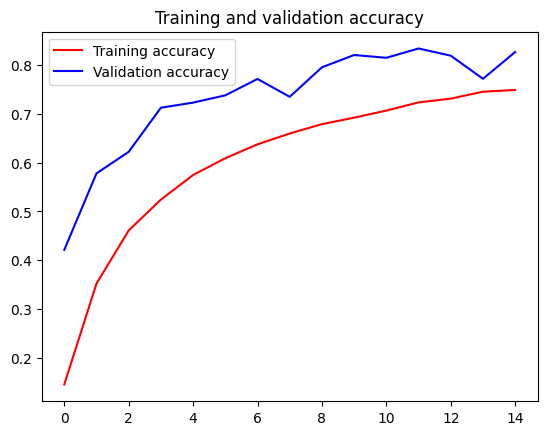

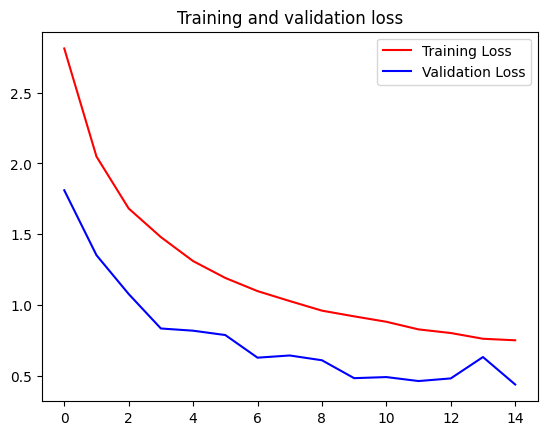

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:

!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip



--2023-06-21 07:55:41--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  36.9MB/s    in 6.0s    

2023-06-21 07:55:47 (31.8 MB/s) - ‘rps.zip’ saved [200682221/200682221]



In [6]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-06-21 07:55:48--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rps-test-set.zip    100%[===================>]  28.15M  15.7MB/s    in 1.8s    

2023-06-21 07:55:50 (15.7 MB/s) - ‘rps-test-set.zip’ saved [29516758/29516758]



In [16]:
import zipfile


local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()


In [18]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])


total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock03-115.png', 'rock06ck02-045.png', 'rock06ck02-093.png', 'rock07-k03-060.png', 'rock03-071.png', 'rock03-118.png', 'rock03-041.png', 'rock01-076.png', 'rock06ck02-085.png', 'rock01-020.png']
['paper06-054.png', 'paper03-096.png', 'paper03-114.png', 'paper06-044.png', 'paper03-087.png', 'paper02-060.png', 'paper07-112.png', 'paper07-118.png', 'paper02-014.png', 'paper03-070.png']
['scissors04-079.png', 'scissors01-117.png', 'testscissors02-091.png', 'scissors02-096.png', 'scissors04-089.png', 'testscissors01-076.png', 'scissors04-018.png', 'scissors01-078.png', 'scissors01-089.png', 'testscissors01-008.png']


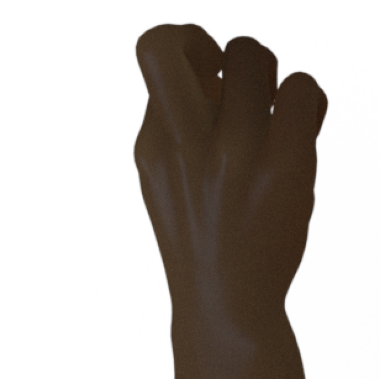

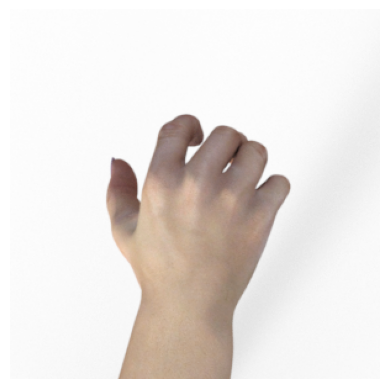

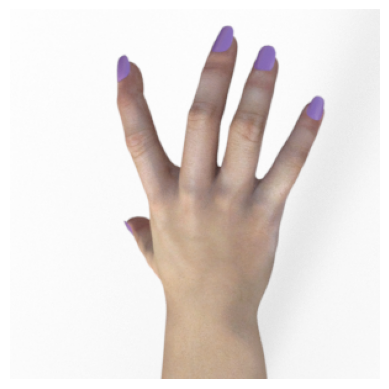

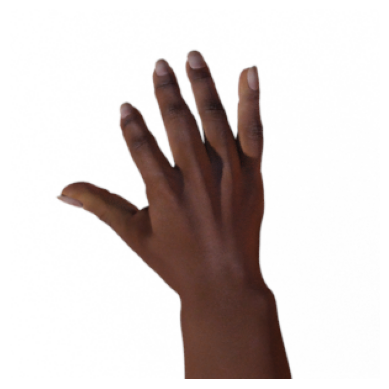

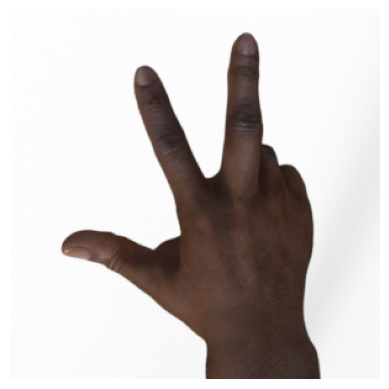

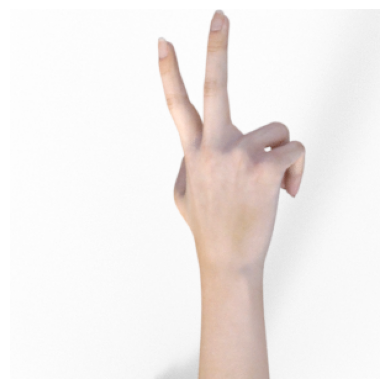

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()


In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 128)     

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [23]:

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [24]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


Epoch 1/25
20/20 [==============================] - 29s 1s/step - loss: 1.2373 - accuracy: 0.3452 - val_loss: 1.0946 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 23s 1s/step - loss: 1.1027 - accuracy: 0.3837 - val_loss: 1.1056 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 23s 1s/step - loss: 1.0982 - accuracy: 0.3905 - val_loss: 1.1032 - val_accuracy: 0.3333
Epoch 4/25
20/20 [==============================] - 22s 1s/step - loss: 1.1308 - accuracy: 0.4440 - val_loss: 1.0182 - val_accuracy: 0.3333
Epoch 5/25
20/20 [==============================] - 22s 1s/step - loss: 1.0687 - accuracy: 0.5103 - val_loss: 0.7122 - val_accuracy: 0.7124
Epoch 6/25
20/20 [==============================] - 21s 1s/step - loss: 0.8517 - accuracy: 0.5921 - val_loss: 0.5473 - val_accuracy: 0.8280
Epoch 7/25
20/20 [==============================] - 22s 1s/step - loss: 0.7467 - accuracy: 0.6508 - val_loss: 0.4670 - val_accuracy: 0.9731
Epoch 8/25
20/20 [==

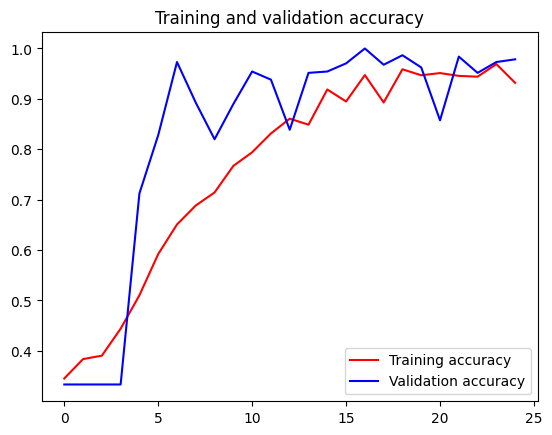

<Figure size 640x480 with 0 Axes>

In [25]:

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()


In [26]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():


  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)


Saving rock.png to rock.png
Saving scissor.png to scissor.png
1/1 [==============================] - 0s 272ms/step
rock.png
[[1. 0. 0.]]
1/1 [==============================] - 0s 20ms/step
scissor.png
[[0. 1. 0.]]


In [ ]:
import os, signal

os.kill(     os.getpid() ,
         signal.SIGKILL
       )